# Churn Prediction Using ML
#### Jerry Anto M, gmail: jerryanto.anthoni@gmail.com, Mobile.no:9894210725

### Importing Data

In [1]:
import pandas as pd

In [2]:
### importing data
df=pd.read_excel('churn.xlsx')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB
None


In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


### Removing unwanted columns

In [5]:

df = df.drop(['CustomerID', 'Name'],axis=1)


In [6]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


### checking for missing values

In [7]:

df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### Data Exploration

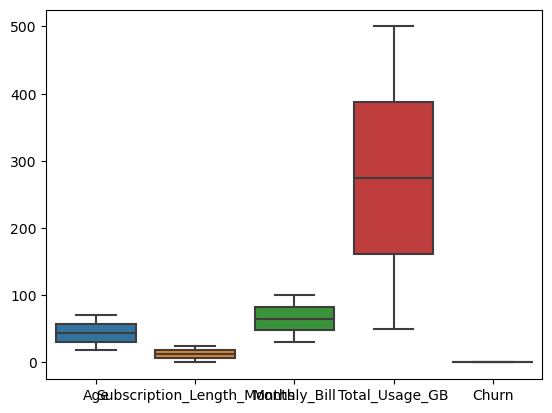

In [8]:
# Visualize outliers using box plots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()

In [9]:
# which city's datas are we have?
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [10]:
df['Subscription_Length_Months'].value_counts()

20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
18    4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
8     4106
19    4106
4     4098
23    4083
17    4064
Name: Subscription_Length_Months, dtype: int64

In [11]:
df['Age'].value_counts()

33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    1845
18    1839
65    1833
45    1827
52    1824
32    1810
67    1798
34    1797
22    1787
Name: Age, dtype: int64

In [12]:
df['30+'] = df['Age'].apply(lambda age: 1 if age > 30 else 0)
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,30+
0,63,Male,Los Angeles,17,73.36,236,0,1
1,62,Female,New York,1,48.76,172,0,1
2,24,Female,Los Angeles,5,85.47,460,0,0


In [13]:
# Assuming df is your DataFrame
df['sub15+'] = df['Subscription_Length_Months'].apply(lambda length: 1 if length > 15 else 0)

# Display the updated DataFrame
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,30+,sub15+
0,63,Male,Los Angeles,17,73.36,236,0,1,1
1,62,Female,New York,1,48.76,172,0,1,0
2,24,Female,Los Angeles,5,85.47,460,0,0,0


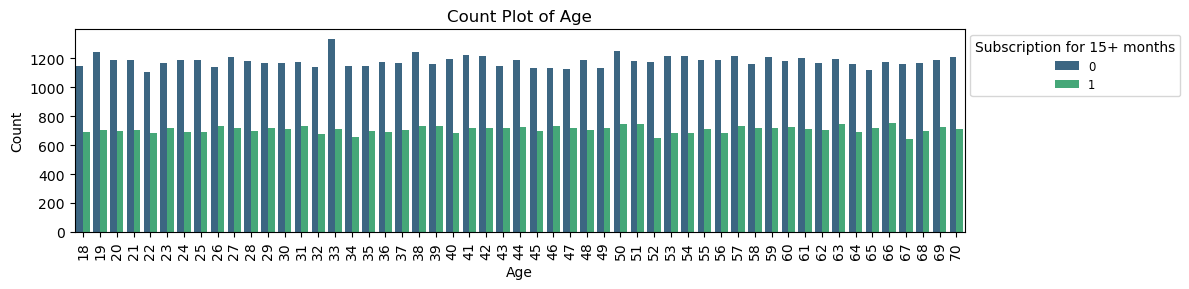

In [14]:
plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='Age', hue='sub15+',palette='viridis')
plt.title('Count Plot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Subscription for 15+ months', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


#### Conclusion : All the age categories are in equal amounts and averagely in all the age goups 50% of the members are having more than 15+ months of subcription 

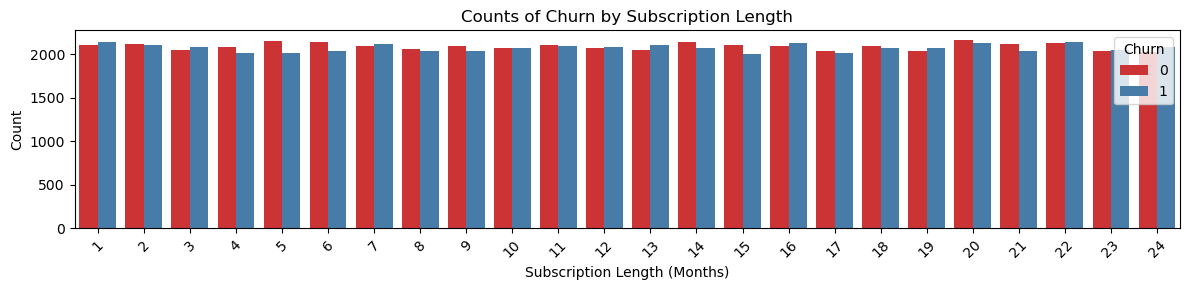

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='Subscription_Length_Months', hue='Churn', palette='Set1')
plt.title('Counts of Churn by Subscription Length')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


#### The above graph is a plot btw no.of.subcription months remaining and no.of.members are churn and not churn
#### Conclusion: In every month category equal no.of chrun and not churn are there

In [16]:
df["Total_Usage_GB"].max()

500

In [17]:
# Assuming df is your DataFrame
df['250+gb'] = df["Total_Usage_GB"].apply(lambda length: 1 if length > 250 else 0)


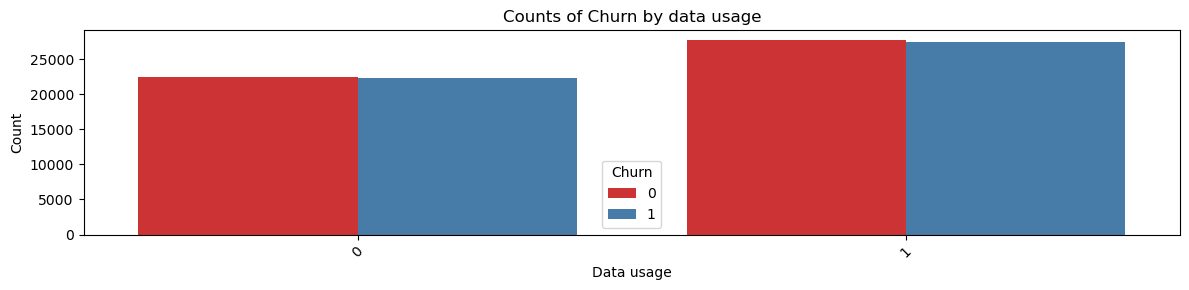

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='250+gb', hue='Churn', palette='Set1')
plt.title('Counts of Churn by data usage')
plt.xlabel('Data usage')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [19]:
#people who are using more than 250+ gb and churn
df[(df['250+gb'] == 1) & (df['Churn'] == 1)].shape[0]

27485

In [20]:
#people who are using more than 250+ gb and not churn
df[(df['250+gb'] == 1) & (df['Churn'] == 0)].shape[0]

27712

In [21]:
#people who are not using more than 250+ gb and churn
df[(df['250+gb'] == 0) & (df['Churn'] == 1)].shape[0]

22294

In [22]:
#people who are not using more than 250+ gb and not churn
df[(df['250+gb'] == 0) & (df['Churn'] == 0)].shape[0]

22509

### There is no info gain by data usage and churn

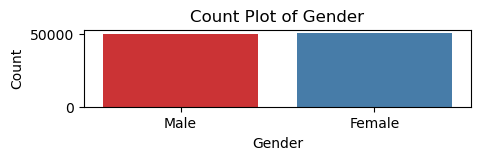

In [23]:
# Assuming df is your DataFrame
plt.figure(figsize=(5, 1))
sns.countplot(data=df, x='Gender', palette='Set1')
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### This data set has equal amount of data in every case

### categorical values to numerical

In [24]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,30+,sub15+,250+gb
0,63,Male,Los Angeles,17,73.36,236,0,1,1,0
1,62,Female,New York,1,48.76,172,0,1,0,0
2,24,Female,Los Angeles,5,85.47,460,0,0,0,1
3,36,Female,Miami,3,97.94,297,1,1,0,1
4,46,Female,Miami,19,58.14,266,0,1,1,1


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])


In [26]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,30+,sub15+,250+gb
0,63,1,2,17,73.36,236,0,1,1,0
1,62,0,4,1,48.76,172,0,1,0,0
2,24,0,2,5,85.47,460,0,0,0,1
3,36,0,3,3,97.94,297,1,1,0,1
4,46,0,3,19,58.14,266,0,1,1,1


In [27]:
df["Location"].value_counts()

1    20157
2    20041
3    20031
0    19958
4    19813
Name: Location, dtype: int64

In [28]:
df["Gender"].value_counts()

0    50216
1    49784
Name: Gender, dtype: int64

In [29]:
df_1=df.drop(['30+','sub15+','250+gb'],axis=1)

In [30]:
df_1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


### splitting for Training and testing

In [85]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df_1.drop('Churn', axis=1)  # Features (excluding the target column 'Churn')
y = df_1['Churn']  # Target column

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 6)
X_test shape: (20000, 6)
y_train shape: (80000,)
y_test shape: (20000,)


### Random Forest with out scaling

In [87]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [88]:
y_pred = rf_model.predict(X_test)

In [89]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[5319 4760]
 [5236 4685]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     10079
           1       0.50      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [90]:

# Different values of n_estimators to try
n_estimators_values = [50, 100, 150, 200]

# Iterate over different n_estimators
for n_estimators in n_estimators_values:
    print(f"Number of Estimators: {n_estimators}")
    
    # Create a Random Forest Classifier with current n_estimators
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Generate a classification report
    class_report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", class_report)
    print("---------------------------")





Number of Estimators: 50
Confusion Matrix:
 [[5422 4657]
 [5393 4528]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     10079
           1       0.49      0.46      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

---------------------------
Number of Estimators: 100
Confusion Matrix:
 [[5319 4760]
 [5236 4685]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     10079
           1       0.50      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

---------------------------
Number of Estimators: 150
Confusion Matrix:
 [[5223 4856]
 [5240 4681]]

Classification Report:
 

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of scaled data
print("Scaled X_train:")
X_train_scaled[:5, :]


Scaled X_train:


array([[0.69230769, 0.        , 1.        , 0.17391304, 0.77857143,
        0.34444444],
       [0.19230769, 1.        , 1.        , 1.        , 0.74371429,
        0.42      ],
       [0.75      , 1.        , 0.        , 0.47826087, 0.31842857,
        0.02666667],
       [0.01923077, 1.        , 0.25      , 0.7826087 , 0.03671429,
        0.27333333],
       [0.73076923, 0.        , 0.75      , 0.30434783, 0.05028571,
        0.58666667]])

### random Forest with Scaling

In [92]:

# Different values of n_estimators to try
n_estimators_values = [50, 100, 150, 200]

# Iterate over different n_estimators
for n_estimators in n_estimators_values:
    print(f"Number of Estimators: {n_estimators}")
    
    # Create a Random Forest Classifier with current n_estimators
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train_scaled, y_train)

    # Predict on the test data
    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Predict on the scaled test data
    y_pred = rf_model.predict(X_test_scaled)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Generate a classification report
    class_report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", class_report)
    print("---------------------------")


Number of Estimators: 50
Confusion Matrix:
 [[5421 4658]
 [5400 4521]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     10079
           1       0.49      0.46      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

---------------------------
Number of Estimators: 100
Confusion Matrix:
 [[5317 4762]
 [5208 4713]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.53      0.52     10079
           1       0.50      0.48      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

---------------------------
Number of Estimators: 150
Confusion Matrix:
 [[5228 4851]
 [5228 4693]]

Classification Report:
 

###  Conclusion :Random Forest doesnt work good on both scaled and unscaled data

### Logistic regression without scaling

In [93]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the original training data
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test)

# Generate a confusion matrix for original data
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display the confusion matrix
print("Confusion Matrix (Original Data):\n", conf_matrix_logreg)
class_report = classification_report(y_test, y_pred_logreg )
print("\nClassification Report:\n", class_report)
print("---------------------------")


Confusion Matrix (Original Data):
 [[6067 4012]
 [6046 3875]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55     10079
           1       0.49      0.39      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

---------------------------


### Logistic regression with scaling

In [94]:
# Create a Logistic Regression model
logreg_model_scaled = LogisticRegression(random_state=42)

# Fit the model on the scaled training data
logreg_model_scaled.fit(X_train_scaled, y_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the scaled test data
y_pred_logreg_scaled = logreg_model_scaled.predict(X_test_scaled)

# Generate a confusion matrix for scaled data
conf_matrix_logreg_scaled = confusion_matrix(y_test, y_pred_logreg_scaled)

# Display the confusion matrix
print("Confusion Matrix (Scaled Data):\n", conf_matrix_logreg_scaled)


Confusion Matrix (Scaled Data):
 [[6269 3810]
 [6144 3777]]


In [95]:
class_report = classification_report(y_test,y_pred_logreg_scaled )
print("\nClassification Report:\n", class_report)
print("---------------------------")



Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

---------------------------


### naive bayes on unscaled data

In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model on the original training data
naive_bayes_model.fit(X_train, y_train)

# Predict on the test data
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Generate a confusion matrix for original data
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Display the confusion matrix
print("Confusion Matrix (Original Data):\n", conf_matrix_naive_bayes)
class_report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)
print("Classification Report (Scaled Data):\n", class_report_naive_bayes)

Confusion Matrix (Original Data):
 [[6416 3663]
 [6305 3616]]
Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.50      0.64      0.56     10079
           1       0.50      0.36      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



### Naive bayes on scaled data

In [97]:

naive_bayes_model_scaled = GaussianNB()

# Fit the model on the scaled training data
naive_bayes_model_scaled.fit(X_train_scaled, y_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the scaled test data
y_pred_naive_bayes_scaled = naive_bayes_model_scaled.predict(X_test_scaled)

# Generate a classification report for scaled data
class_report_naive_bayes_scaled= classification_report(y_test, y_pred_naive_bayes_scaled)

# Display the classification report
print("Classification Report (Scaled Data):\n", class_report_naive_bayes_scaled)

# Generate a confusion matrix for scaled data
conf_matrix_naive_bayes_scaled = confusion_matrix(y_test, y_pred_naive_bayes_scaled)

# Display the confusion matrix
print("Confusion Matrix (Scaled Data):\n", conf_matrix_naive_bayes_scaled)


Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.50      0.64      0.56     10079
           1       0.50      0.36      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

Confusion Matrix (Scaled Data):
 [[6416 3663]
 [6305 3616]]


### KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the original training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Generate a confusion matrix for original data
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
print("Confusion Matrix (Original Data):\n", conf_matrix_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Display the classification report
print("Classification Report (Scaled Data):\n", class_report_knn)


Confusion Matrix (Original Data):
 [[5115 4964]
 [5076 4845]]
Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.50      0.51      0.50     10079
           1       0.49      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### KNN on scaled

In [99]:
#Create a KNN model
knn_model_scaled = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the scaled training data
knn_model_scaled.fit(X_train_scaled, y_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the scaled test data
y_pred_knn_scaled = knn_model_scaled.predict(X_test_scaled)

# Generate a classification report for scaled data
class_report_knn_scaled = classification_report(y_test, y_pred_knn_scaled)

# Display the classification report
print("Classification Report (Scaled Data):\n", class_report_knn_scaled)

# Generate a confusion matrix for scaled data
conf_matrix_knn_scaled = confusion_matrix(y_test, y_pred_knn_scaled)

# Display the confusion matrix
print("Confusion Matrix (Scaled Data):\n", conf_matrix_knn_scaled)


Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.49      0.50      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix (Scaled Data):
 [[5068 5011]
 [5010 4911]]


### decision tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the original training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Generate a confusion matrix for original data
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix
print("Confusion Matrix (Original Data):\n", conf_matrix_dt)


Confusion Matrix (Original Data):
 [[5078 5001]
 [4954 4967]]


### decison tree on scaled data

In [101]:

# Create a Decision Tree model
dt_model_scaled = DecisionTreeClassifier(random_state=42)

# Fit the model on the scaled training data
dt_model_scaled.fit(X_train_scaled, y_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the scaled test data
y_pred_dt_scaled = dt_model_scaled.predict(X_test_scaled)

# Generate a classification report for scaled data
class_report_dt_scaled = classification_report(y_test, y_pred_dt_scaled)

# Display the classification report
print("Classification Report (Scaled Data):\n", class_report_dt_scaled)

# Generate a confusion matrix for scaled data
conf_matrix_dt_scaled = confusion_matrix(y_test, y_pred_dt_scaled)

# Display the confusion matrix
print("Confusion Matrix (Scaled Data):\n", conf_matrix_dt_scaled)


Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.51      0.50      0.50     10079
           1       0.50      0.50      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix (Scaled Data):
 [[5064 5015]
 [4960 4961]]


### DT scaled

In [102]:

# Create a Decision Tree model
dt_model_scaled = DecisionTreeClassifier(random_state=42)

# Fit the model on the scaled training data
dt_model_scaled.fit(X_train_scaled, y_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the scaled test data
y_pred_dt_scaled = dt_model_scaled.predict(X_test_scaled)

# Generate a classification report for scaled data
class_report_dt_scaled = classification_report(y_test, y_pred_dt_scaled)

# Display the classification report
print("Classification Report (Scaled Data):\n", class_report_dt_scaled)

# Generate a confusion matrix for scaled data
conf_matrix_dt_scaled = confusion_matrix(y_test, y_pred_dt_scaled)

# Display the confusion matrix
print("Confusion Matrix (Scaled Data):\n", conf_matrix_dt_scaled)


Classification Report (Scaled Data):
               precision    recall  f1-score   support

           0       0.51      0.50      0.50     10079
           1       0.50      0.50      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix (Scaled Data):
 [[5064 5015]
 [4960 4961]]


### Feed forward neural network

In [103]:
import tensorflow as tf
from tensorflow import keras

In [104]:
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7789 - accuracy: 0.5032 - val_loss: 0.7315 - val_accuracy: 0.5020
Epoch 2/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7290 - accuracy: 0.4994 - val_loss: 0.6966 - val_accuracy: 0.4958
Epoch 3/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.7164 - accuracy: 0.4973 - val_loss: 0.7344 - val_accuracy: 0.4956
Epoch 4/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7068 - accuracy: 0.4990 - val_loss: 0.7033 - val_accuracy: 0.4964
Epoch 5/20
2000/2000 [==============================] - 3s 1ms/step - loss: 0.7022 - accuracy: 0.4995 - val_loss: 0.6944 - val_accuracy: 0.4969
Epoch 6/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6975 - accuracy: 0.5038 - val_loss: 0.6960 - val_accuracy: 0.4976
Epoch 7/20
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy:

In [105]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_prob = model.predict(X_test_scaled)  # Get continuous predictions

# Convert continuous predictions to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("\nClassification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
#print("\nClassification Report:\n", class_report)

625/625 [==============================] - 1s 802us/step

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.31      0.38     10079
           1       0.50      0.70      0.58      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000

Confusion Matrix:
 [[3105 6974]
 [3002 6919]]


In [106]:
y_pred_prob

array([[0.49975532],
       [0.5067695 ],
       [0.49975532],
       ...,
       [0.5046513 ],
       [0.50794303],
       [0.5041169 ]], dtype=float32)

In [107]:
y_pred_binary

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

### CNN

In [108]:
X_train_reshaped = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

In [109]:
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Build the CNN model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history=model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
y_pred_prob = model.predict(X_test_reshaped)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4981
Epoch 3/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6935 - val_accuracy: 0.4983
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 5/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4972
Epoch 6/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6933 - val_accuracy: 0.4979
Epoch 7/100
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5061 - val_loss: 0.6934 - val_ac

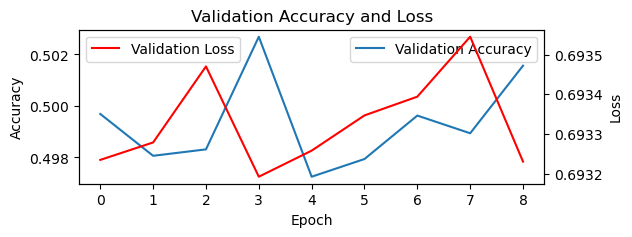

In [110]:
plt.figure(figsize=(6, 2))

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy and Loss')
plt.legend()

# Add a twin y-axis for validation loss
plt.twinx()
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.ylabel('Loss')
plt.legend()

plt.show()

### CNN_64batch

In [111]:
#Fine tuning
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Build the CNN model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history=model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
y_pred_prob = model.predict(X_test_reshaped)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.4976
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5006
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5070 - val_loss: 0.6936 - val_accuracy: 0.4964
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5079 - val_loss: 0.6932 - val_accuracy: 0.5009
Epoch 5/100
625/625 [==============================] - 1s 1ms/step
Confusion Matrix:
 [[4998 5081]
 [4838 5083]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.50      0.50     10079
           1       0.50      0.51      0.51      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted a

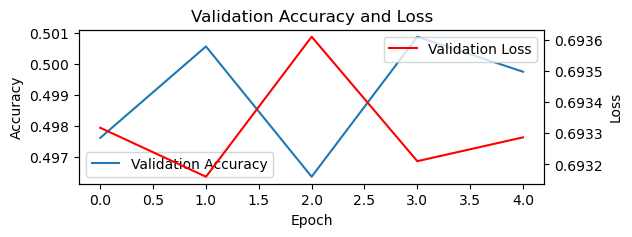

In [112]:
plt.figure(figsize=(6, 2))

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy and Loss')
plt.legend()

# Add a twin y-axis for validation loss
plt.twinx()
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Random forest with cross validation

In [113]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print("\nClassification Report:\n", class_report)


Cross-Validation Scores: [0.4954375 0.492875  0.490125  0.4975625 0.5038125]
Mean CV Score: 0.4959625
Confusion Matrix:
 [[5319 4760]
 [5236 4685]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     10079
           1       0.50      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### ALL THE MODELS ARE GIVING ONLY 50% ACCURACY

### Predicting values

In [114]:
# Input new data for prediction
new_age = float(input("Enter Age: "))
new_gender = input("Enter Gender (Male[1]/Female[0]): ")
new_location = input("Enter Location: ")
new_subscription_length = float(input("Enter Subscription Length (in months): "))
new_monthly_bill = float(input("Enter Monthly Bill: "))
new_total_usage = float(input("Enter Total Usage (in GB): "))

# Create a new DataFrame with the input data
new_data = pd.DataFrame([[new_age, new_gender, new_location, new_subscription_length, new_monthly_bill, new_total_usage]],
                        columns=['Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'])

# Make a prediction using the trained model
predicted_churn = rf_model.predict(new_data)

if predicted_churn == 0:
    print("Predicted Churn: No")
else:
    print("Predicted Churn: Yes")

Enter Age: 35
Enter Gender (Male[1]/Female[0]): 1
Enter Location: 2
Enter Subscription Length (in months): 5
Enter Monthly Bill: 248
Enter Total Usage (in GB): 345
Predicted Churn: No
